
<h1 id="Frequency-analysis-and-Fourier-Transform">Frequency analysis and Fourier Transform<a class="anchor-link" href="#Frequency-analysis-and-Fourier-Transform">¶</a></h1>
<p>Note that there are some coding excercises and theoritical textual questions left for you. Read through the notebook and answer all the questions</p> <br>
<font color = 'orange'> *Sudarsanan A K <br> SC21M063 </font>


<h2 id="Outline">Outline<a class="anchor-link" href="#Outline">¶</a></h2><ul>
<li>Frequency analysis of images</li>
</ul>



<h2 id="Jean-Baptiste-Joseph-Fourier-(1786-—-1830)">Jean Baptiste Joseph Fourier (1786 — 1830)<a class="anchor-link" href="#Jean-Baptiste-Joseph-Fourier-(1786-—-1830)">¶</a></h2><ul>
<li>Any univariate function can be re-written as a sum of sines and cosines of different frequencies (1807)</li>
<li>No one believed him  </li>
<li>Not translated into English until 1878</li>
<li>It’s true, and it is called <em>Fourier Series</em></li>
</ul>



<h2 id="Sine-Wave">Sine Wave<a class="anchor-link" href="#Sine-Wave">¶</a></h2>$$
y = a \sin(\omega t + \phi)
$$<p>Here $\omega$ represents <em>angular frequency</em> and $\phi$ represents phase.  Recall that $t$ is time and $\omega = 2 \pi f$, where $f$ is frequency.</p>


In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

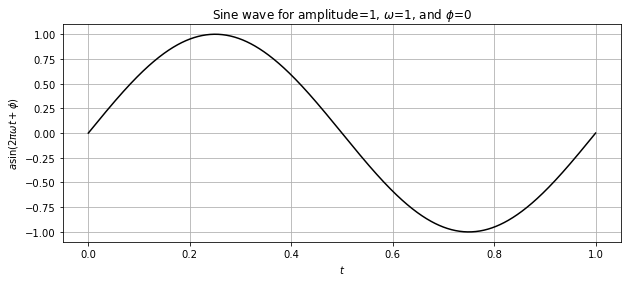

In [2]:
t = np.linspace(0, 1, 1000)

a = 1 # amplitude
f = 1 # frequency
p = 0 # phase
omega = 2 * np.pi * f # angular velocity
y = a * np.sin( omega * t + p)

plt.figure(figsize=(10, 4))
plt.title(f'Sine wave for amplitude={a}, $\omega$={f}, and $\phi$={p}')
plt.plot(t, y, 'k')
plt.xlabel('$t$')
plt.ylabel('$a \sin(2 \pi \omega t + \phi)$');
plt.grid()

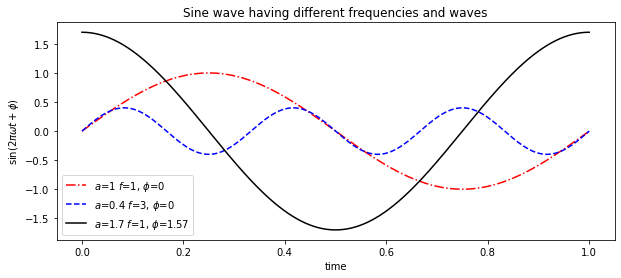

In [3]:
t = np.linspace(0, 1, 1000)

a1 = 1
f1 = 1
p1 = 0
omega1 = 2 * np.pi * f1
y1 = a1 * np.sin( omega1 * t + p1)

a2 = 0.4
f2 = 3
p2 = 0
omega2 = 2 * np.pi * f2
y2 = a2 * np.sin( omega2 * t + p2)

a3 = 1.7
f3 = 1
p3 = np.pi/2
omega3 = 2 * np.pi * f3
y3 = a3 * np.sin( omega3 * t + p3)


plt.figure(figsize=(10,4))
plt.title(f'Sine wave having different frequencies and waves')
plt.plot(t, y1, 'r-.', label=f'$a$={a1} $f$={f1}, $\phi$={p1}')
plt.plot(t, y2, 'b--', label=f'$a$={a2} $f$={f2}, $\phi$={p2}')
plt.plot(t, y3, 'k', label=f'$a$={a3} $f$={f3}, $\phi$={p3:4.3}')
plt.legend()
plt.xlabel('time')
plt.ylabel('$\sin(2 \pi \omega t + \phi)$');


<h2 id="Key-idea">Key idea<a class="anchor-link" href="#Key-idea">¶</a></h2><ul>
<li>If we have enough sine waves with different amplitudes, frequencies, and phases, we can represent any signal. </li>
</ul>


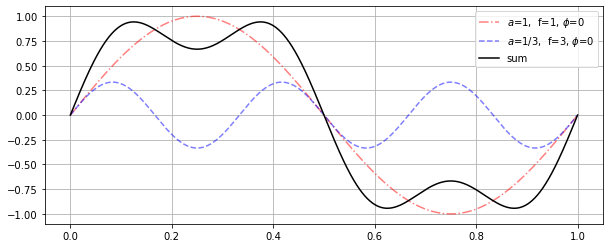

In [4]:
y = np.zeros([2, 1000])
t = np.linspace(0, 1, 1000)

a, f, p = 1, 1, 0
omega = 2 * np.pi * f
y[0,:] = a * np.sin(omega * t + p)

a, f, p = 1/3, 3, 0
omega = 2 * np.pi * f
y[1,:] = a * np.sin(omega * t + p)

plt.figure(figsize=(10,4))
plt.plot(t, y[0,:], 'r-.', label=f'$a$=1,  f={1}, $\phi$={0}', alpha=0.5)
plt.plot(t, y[1,:], 'b--', label=f'$a$=1/3,  f={3}, $\phi$={0}', alpha=0.5)
plt.plot(t, np.sum(y, 0), 'k', label='sum')
plt.legend();
plt.grid()


<h2 id="Square-wave">Square wave<a class="anchor-link" href="#Square-wave">¶</a></h2><p>We extend this idea to construct a square wave.</p>
$$
y = \sum_{f=[1,3,5,\cdots]}^\infty \frac{1}{f} \sin(2 \pi f t)
$$

<p>Write a function <code>square_wave()</code> to construct a square wave using the above formula</p>

In [5]:
def square_wave(n_components, n_samples=1000):
    """
    Constructs a square wave using sine wave components.
    
    Returns time (t), generated wave (y), and individual components (c)
    """
    
    c = np.zeros([n_components, 1000])
    t = np.linspace(0, 1, 1000)
    
    ###################################################################
    # t - time array : dimension - 1000,1
    # c - all sine component signals : dimension - number of components,1000
    # y - square wave : dimension - 1000,1

    # Write your solution here (approx. 7 lines of code)
    # Hint: Use a for loop
    ###################################################################
    a, f, p = 1, 1, 0
    for i in range(n_components):
        omega = 2 * np.pi * f
        c[i,:] = a * np.sin(omega * t + p)
        f = f + 2
        a = 1 / f
    y = np.sum(c, 0)
    ###################################################################
    return t, y, c

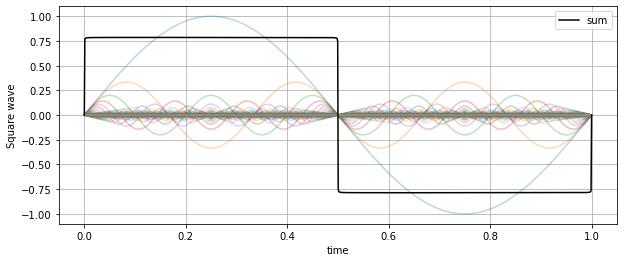

In [6]:
n_components = 2000
t, y, c = square_wave(n_components)

plt.figure(figsize=(10,4))
for i in range(np.min([100, n_components])):
    plt.plot(t, c[i,:], alpha=0.3)   
plt.plot(t, y, 'k', label='sum')
plt.xlabel('time')
plt.ylabel('Square wave');
plt.legend();
plt.grid()


<h2 id="Fourier-transform">Fourier transform<a class="anchor-link" href="#Fourier-transform">¶</a></h2><p>Fourier transform often refers to both the process of decomposing a signal to its frequency components, and the resulting frequencies.</p>
$$
\mathcal{F}\{ f(x) \} = \hat{f}(\omega) = \frac{1}{2 \pi} \int_{-\infty}^\infty f(x) e^{- i \omega x} dx
$$<p>$\hat{f}(\omega)$ refers to the Fourier transform of signal $f(x)$.  We often denote Fourier transform of a function by adding a circumflex ($\hat{}$) to the symbol of that function.</p>
<p>Fourier transform stores the magnitude and phase at each frequency. Magnitude encodes how much signal is at a particular frequency, and phase encodes spatial information (indirectly).  For mathematical convenience, this information is stored as complex numbers.  Specifically at each frequency $\omega_o$, we are given</p>
$$
c + d i
$$<p>Then signal strength (or amplitude)  is</p>
$$a_o = \pm \sqrt{c^2 + d^2}$$<p></p>
<p>and phase is</p>
$$\phi_o = \arctan \left( \frac{d}{c} \right).$$<p></p>
<p>Recall that $i = \sqrt{-1}$.</p>



<h2 id="Complex-numbers-in-Numpy">Complex numbers in Numpy<a class="anchor-link" href="#Complex-numbers-in-Numpy">¶</a></h2><p>Numpy supports complex numbers.  Given a complex number x</p>
<ul>
<li><code>complex()</code> constructs a complex number</li>
<li><code>x.real</code> refers to real component</li>
<li><code>x.imag</code> refers to imaginary component</li>
<li><code>np.abs(x)</code> computes magnitude (or amplitude above)</li>
<li><code>np.angle(x)</code> computes angle in radians (or phase above)</li>
</ul>


In [7]:
x = complex(1, 2)
print(f'complex number x    = {x}')
print(f'real part of x      = {x.real}')
print(f'imaginary part of x = {x.imag}')
print(f'magnitude of      x = {np.abs(x)}')
print(f'angle of x          = {np.angle(x)*180/np.pi} degrees')

complex number x    = (1+2j)
real part of x      = 1.0
imaginary part of x = 2.0
magnitude of      x = 2.23606797749979
angle of x          = 63.43494882292201 degrees



<h2 id="Inverse-Fourier-Transform">Inverse Fourier Transform<a class="anchor-link" href="#Inverse-Fourier-Transform">¶</a></h2><p>Given a Fourier transform of a signal, it is possiible to reconstruct that signal in time domain</p>
$$
\mathcal{F}^{-1}\{ \hat{f}(\omega) \} = f(x) = \frac{1}{2 \pi} \int_{-\infty}^\infty \hat{f}(\omega) e^{i \omega x} d \omega
$$



<h2 id="Discrete-Fourier-Transform-(DFT)">Discrete Fourier Transform (DFT)<a class="anchor-link" href="#Discrete-Fourier-Transform-(DFT)">¶</a></h2><p>A sequence of $N$ numbers</p>
$$
x_0, x_1, x_2, \cdots, x_{N-1}
$$<p>can be transformed into an $N$-periodic sequence of complex numbers</p>
$$
X_k = \sum_{n=0}^{N-1} x_n e^{-2 \pi k n / N}
$$<p>Fast Fourier Transform (FFT) is $N \log N$.</p>
<p>It is easy to recover the original sequence $x$ given its Fourier transform $X$.</p>



<h2 id="FFT-in-Numpy">FFT in Numpy<a class="anchor-link" href="#FFT-in-Numpy">¶</a></h2>


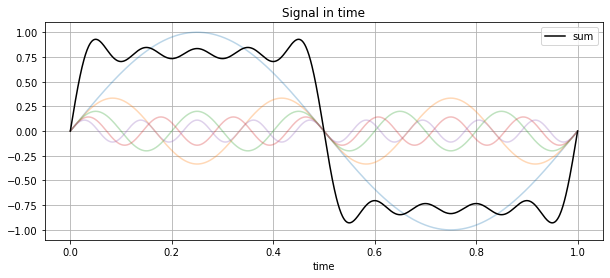

In [8]:
n_samples = 1000

# Rate is defined as the number of samples per unit time (usually seconds).
# Notice below 
frate = n_samples  

n_components = 5
t, y, c = square_wave(n_components)

plt.figure(figsize=(10,4))
for i in range(np.min([100, n_components])):
    plt.plot(t, c[i,:], alpha=0.3)   
plt.plot(t, y, 'k', label='sum')
plt.legend();
plt.xlabel('time')
plt.title('Signal in time')
plt.grid()
plt.show()


<p>Check out <code>np.fft</code> module for functions for performing FFT.</p>



<h3 id="Computing-DFT">Computing DFT<a class="anchor-link" href="#Computing-DFT">¶</a></h3><p>Below <code>x</code> denotes signal in time, and <code>X</code> denotes its Fourier transform.</p>


In [9]:
# To be consistent to mathematical notation, let x be our signal in time (seen above)
x = y 

# FFT of x
X_ = np.fft.fft(x)
X = np.fft.fftshift(X_)  # fftshift shifts X such that 0 frequency sits in the center as opposed to the end

<h3 id="Frequency-range">Frequency range<a class="anchor-link" href="#Frequency-range">¶</a></h3><p>We have 1000 samples.  According to Nyquist Theorem (or Sampling Theorem), the largest frequency that we can represent is 500 Hz.  As per Fourier transform theory, the transform is reflected around 0, so we also get a negative frequencies.</p>


In [10]:
freqs_ = np.fft.fftfreq(len(y))
freqs = np.fft.fftshift(freqs_)

print(f'Minimum frequency = {freqs.min()*1000} and Maximum frequency = {freqs.max()*1000}')

Minimum frequency = -500.0 and Maximum frequency = 499.0



<h3 id="Identifying-dominant-frequencies">Identifying dominant frequencies<a class="anchor-link" href="#Identifying-dominant-frequencies">¶</a></h3><p>FFT analysis allows us to identify dominant frequencies present in the signal.  Check magnitude (or amplitudes) for different frequencies, and pick frequencies that have large magnitudes.</p>


In [11]:
idx = np.argsort(np.abs(X[:500])) # Note that we are not sorting magnitudes, rather we sort indices using magnitudes as the decision value


<p>Let's pick top k frequency components.</p>


In [12]:
k = 20
top_k_freq_idx = idx[-k:][::-1]

j = 0
freq_amp = np.empty([k, 2])
for i in top_k_freq_idx:
    freq_ = np.abs(freqs[i])*frate
    amp_ = np.abs(X[i])*2/frate
    freq_amp[j,:] = [freq_, amp_]
    print(f'Frequency / amplitude {freq_:.3} / {amp_:4.2}')
    j += 1

Frequency / amplitude 1.0 /  1.0
Frequency / amplitude 3.0 / 0.33
Frequency / amplitude 5.0 /  0.2
Frequency / amplitude 7.0 / 0.14
Frequency / amplitude 9.0 / 0.11
Frequency / amplitude 10.0 / 0.0021
Frequency / amplitude 11.0 / 0.0015
Frequency / amplitude 12.0 / 0.0012
Frequency / amplitude 8.0 / 0.0011
Frequency / amplitude 13.0 / 0.001
Frequency / amplitude 14.0 / 0.00089
Frequency / amplitude 15.0 / 0.0008
Frequency / amplitude 16.0 / 0.00073
Frequency / amplitude 6.0 / 0.0007
Frequency / amplitude 17.0 / 0.00067
Frequency / amplitude 18.0 / 0.00063
Frequency / amplitude 19.0 / 0.00059
Frequency / amplitude 20.0 / 0.00055
Frequency / amplitude 21.0 / 0.00052
Frequency / amplitude 22.0 / 0.00049


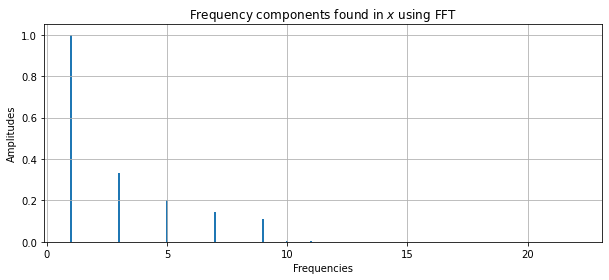

In [13]:
plt.figure(figsize=(10,4))
plt.bar(freq_amp[:,0], freq_amp[:,1], width=0.1)
plt.title('Frequency components found in $x$ using FFT')
plt.xlabel('Frequencies')
plt.ylabel('Amplitudes');
plt.grid()


<h2 id="Inverse-FFT">Inverse FFT<a class="anchor-link" href="#Inverse-FFT">¶</a></h2><p>We can use the inverse FFT to reconstruct the original signal $x$ given its (discrete, in our case) Fourier transform $X$</p>


In [14]:
# Note that we are "unshifted version" of X.  The "shifted version" 
# is really only useful for visualization and human understand.

# Good to remember that x_reconstructed has both a real and an imaginary part
###################################################################
# x_reconstructed - inverse fft signal : dimension - 1000,

# Write your solution here (1 line of code)
###################################################################
x_reconstructed = np.fft.ifft(X_)
###################################################################

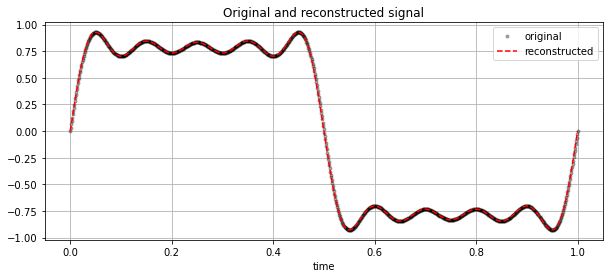

In [15]:
plt.figure(figsize=(10,4))
plt.plot(t, x, 'k.', label='original', alpha=0.3)
plt.plot(t, np.real(x_reconstructed), 'r--', label='reconstructed')
plt.title('Original and reconstructed signal')
plt.legend()
plt.grid()
plt.xlabel('time');


<h2 id="Nyquist-Theorem-(or-Sampling-theorem)">Nyquist Theorem (or Sampling theorem)<a class="anchor-link" href="#Nyquist-Theorem-(or-Sampling-theorem)">¶</a></h2><p>The Nyquist Theorem states that in order to adequately reproduce a signal it should be periodically sampled at a rate that is 2 times the highest frequency one wishes to record.</p>


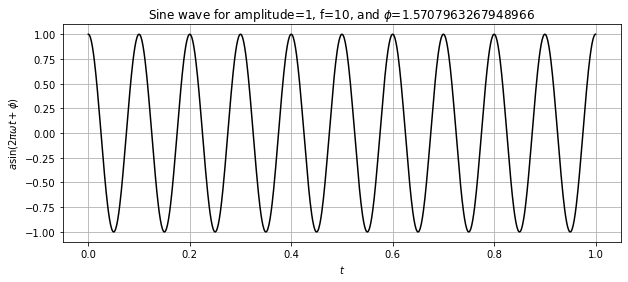

In [16]:
t = np.linspace(0, 1, 1000)

a = 1
f = 10 # Signal frequency
p = np.pi/2
omega = 2 * np.pi * f
y = a * np.sin(omega * t + p)

plt.figure(figsize=(10, 4))
plt.title(f'Sine wave for amplitude={a}, f={f}, and $\phi$={p}')
plt.plot(t, y, 'k')
plt.xlabel('$t$')
plt.grid()
plt.ylabel('$a \sin(2 \pi \omega t + \phi)$');


<h3 id="Sampling-(Analog-to-Digital-Conversion)">Sampling (Analog-to-Digital Conversion)<a class="anchor-link" href="#Sampling-(Analog-to-Digital-Conversion)">¶</a></h3><p>Sampling is perfored to perform <em>analog-to-digital</em> conversion.</p>


In [17]:
Fs = 14 # sample rate
T = 1/Fs # sampling period
sampling_duration = 1 # seconds of sampling
N = Fs * sampling_duration + 1# total points in signal (Not the 1 at the end, this is just to handle the last end point.)

t_sampled = np.arange(N)*T

In [18]:
y_discretized = a * np.sin(omega * t_sampled + p)


<h4 id="Visualizing-sampled-values">Visualizing sampled values<a class="anchor-link" href="#Visualizing-sampled-values">¶</a></h4>


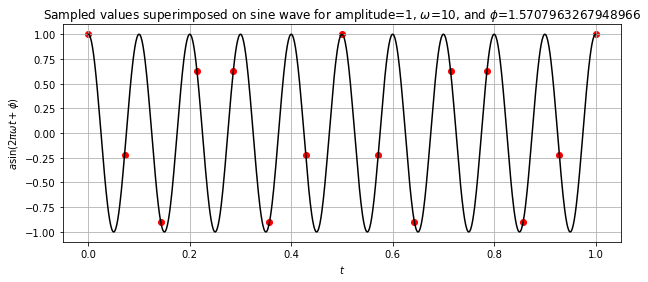

In [19]:
plt.figure(figsize=(10, 4))
plt.title(f'Sampled values superimposed on sine wave for amplitude={a}, $\omega$={f}, and $\phi$={p}')
plt.plot(t, y, 'k')
plt.scatter(t_sampled, y_discretized, color='red')
plt.xlabel('$t$')
plt.grid()
plt.ylabel('$a \sin(2 \pi \omega t + \phi)$');


<h3 id="Reconstruction-(Digital-to-Analog-Conversion)">Reconstruction (Digital-to-Analog Conversion)<a class="anchor-link" href="#Reconstruction-(Digital-to-Analog-Conversion)">¶</a></h3><p>We use one of many available interpolation techniques to reconstruct the analog signal.</p>


In [20]:
from scipy import interpolate

method = 'previous'
method = 'cubic'
y_reconstructed_from_samples1 = interpolate.interp1d(t_sampled, y_discretized, kind=method)(t)


<h4 id="Visualizing-reconstructed-signal">Visualizing reconstructed signal<a class="anchor-link" href="#Visualizing-reconstructed-signal">¶</a></h4>


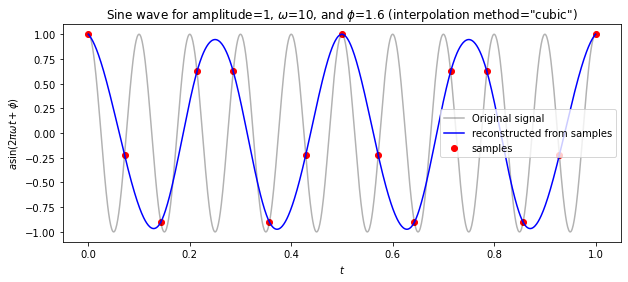

In [21]:
plt.figure(figsize=(10, 4))
plt.title(f'Sine wave for amplitude={a}, $\omega$={f}, and $\phi$={p:3.2} (interpolation method="{method}")')
plt.plot(t, y, 'k', label='Original signal', alpha=0.3)
plt.scatter(t_sampled, y_discretized, color='red', label='samples')
plt.plot(t, y_reconstructed_from_samples1, 'b', label='reconstructed from samples')
plt.xlabel('$t$')
plt.legend()
plt.ylabel('$a \sin(2 \pi \omega t + \phi)$');


<h2 id="Convolution-Theorem">Convolution Theorem<a class="anchor-link" href="#Convolution-Theorem">¶</a></h2><p>Fourier transform of the convolution of two functions is the product of their Fourier transforms.</p>
$$
\mathcal{F}\{g \ast h\} = \mathcal{F}\{g\} \ast \mathcal{F}\{h\}
$$<p>The inverse Fourier transform of the product of two Fourier transform is the convolution of the two inverse Fourier transforms.</p>
$$
\mathcal{F}^{-1}\{g h\} = \mathcal{F}^{-1}\{g\} \ast \mathcal{F}^{-1}\{h\}
$$<p><strong>Convolution in spatial domain is equivalent to multiplication in frequency domain.</strong></p>



<h2 id="Properties-of-Fourier-Transform">Properties of Fourier Transform<a class="anchor-link" href="#Properties-of-Fourier-Transform">¶</a></h2><ul>
<li>Fourier transform of a real signal is symmetric around origin.</li>
<li>The energy of the signal is the same as the energy of its Fourier transform.</li>
<li>Linearity</li>
</ul>
$$
\mathcal{F}\{a g(x) + b h(x)\} = a \mathcal{F}\{g(x)\} + b \mathcal{F}\{h(x)\}
$$



<h2 id="Fourier-Transform-of-an-Image">Fourier Transform of an Image<a class="anchor-link" href="#Fourier-Transform-of-an-Image">¶</a></h2>


In [22]:
import cv2 as cv

In [23]:
img = cv.imread(r"C:\Users\sudar\Desktop\IIST\main\Sem2\CV_LAB\LAB5\05-frequency-analysis_files\messi.jpg", 0)                 # Write the proper path

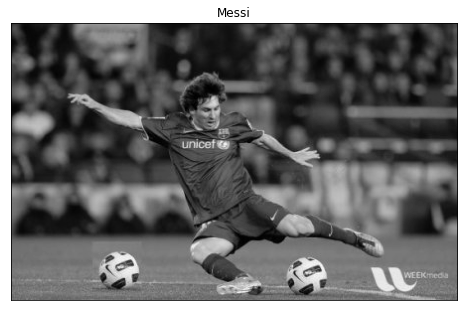

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(img, 'gray')
plt.title('Messi')
plt.xticks([])
plt.yticks([]);

Compute the fourier transform and the shifted fourier transform for this image

In [25]:
###################################################################
# img_fourier - Fourier transform of image : dimension - 280,450
# img_fourier_shifted - Shifted fourier transform of an image : dimension - 280,450

# Write your solution here (2 lines of code)
# Hint: Use np.fft.fft2() for computing fourier transform of an image
###################################################################
img_fourier = np.fft.fft2(img) 
img_fourier_shifted = np.fft.fftshift(img_fourier)
###################################################################
img_spectrum_magnitude = 20 * np.log(np.abs(img_fourier_shifted))

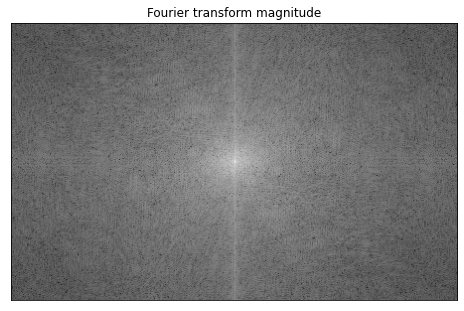

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(img_spectrum_magnitude, cmap = 'gray')
plt.title('Fourier transform magnitude')
plt.xticks([])
plt.yticks([]);


<h2 id="Image-Convolution-using-Fourier-Transform">Image Convolution using Fourier Transform<a class="anchor-link" href="#Image-Convolution-using-Fourier-Transform">¶</a></h2>



<p>Step 1: Construct a 2D Gaussian kernel</p>


In [27]:
import scipy.stats as st

def gkern(kernlen=5, sig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-kernlen/(3*sig), kernlen/(3*sig), kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

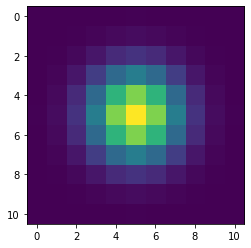

In [28]:
g = gkern(kernlen=11, sig=1)
plt.imshow(g);


<p>Step 2: Make this kernel the same size as the image by padding zeros</p>


In [29]:
h, w = g.shape
g_resized = np.zeros(img.shape)
g_resized[:h,:w] = g

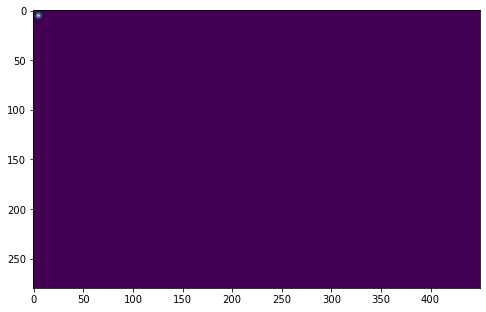

In [30]:
plt.figure(figsize=(8,8))
plt.imshow(g_resized);


<p>Step 3: Take its Fourier Transform</p>


In [31]:
g_fourier = np.fft.fft2(g_resized)
g_fourier_shifted = np.fft.fftshift(g_fourier)
g_spectrum_magnitude = 20 * np.log(np.abs(g_fourier_shifted))

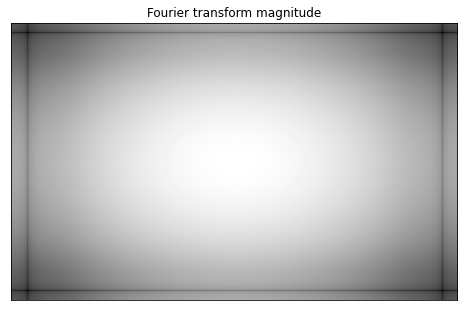

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(g_spectrum_magnitude, cmap = 'gray')
plt.title('Fourier transform magnitude')
plt.xticks([])
plt.yticks([]);


<p>Step 4: Multiply the two fourier transforms</p>


In [33]:
multiplied_fourier = img_fourier * g_fourier


<p>Step 5: Take inverse Fourier transform.</p>


In [34]:
img_filtered = np.real(np.fft.ifft2(multiplied_fourier))

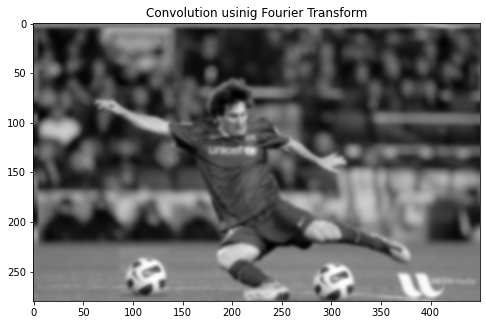

In [35]:
plt.figure(figsize=(8,8))
plt.title('Convolution usinig Fourier Transform')
plt.imshow(img_filtered, cmap='gray');


<p>Step 6: Lets confirm that we get the same result if we use convolution in spatial domain.</p>


In [36]:
img_filtered2 =  sp.signal.convolve2d(img, g, mode='same', boundary='fill')

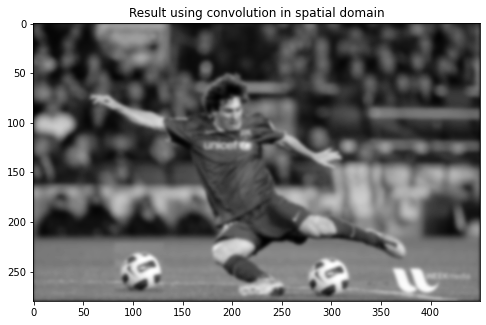

In [37]:
plt.figure(figsize=(8,8))
plt.title('Result using convolution in spatial domain')
plt.imshow(img_filtered2, cmap='gray');


<h2 id="Fourier-Transform-of-Gaussiian-vs.-Averaging-Kernel">Fourier Transform of Gaussian vs. Averaging Kernel<a class="anchor-link" href="#Fourier-Transform-of-Gaussiian-vs.-Averaging-Kernel">¶</a></h2>


Compute fourier transform of the Gaussian Kernel

In [38]:
g = gkern(kernlen=11, sig=1)
###################################################################
# g - Gaussian kernel : dimension - 11,11
# g_resized - Gaussian kernel padded to make it same as image size : dimension - 280,450
# g_fourier_shifted - Shifted fourier transform of g : dimension - 280,450

# Write your solution here (5 lines of code)
###################################################################
h, w = g.shape
g_resized = np.zeros(img.shape)
g_resized[:h,:w] = g
g_fourier = np.fft.fft2(g_resized)
g_fourier_shifted = np.fft.fftshift(g_fourier)
###################################################################
g_spectrum_magnitude = 20 * np.log(np.abs(g_fourier_shifted))


Compute fourier transform of the Averaging Kernel

In [39]:
a = np.ones([11,11])/(11*11)
###################################################################
# a - Averaging kernel : dimension - 11,11
# a_resized - Averaging kernel padded to make it same as image size : dimension - 280,450
# a_fourier_shifted - Shifted fourier transform of a : dimension - 280,450

# Write your solution here (5 lines of code)
###################################################################
h, w = a.shape
a_resized = np.zeros(img.shape)
a_resized[:h,:w] = a
a_fourier = np.fft.fft2(a_resized)
a_fourier_shifted = np.fft.fftshift(a_fourier)
###################################################################
a_spectrum_magnitude = 20 * np.log(np.abs(a_fourier_shifted))

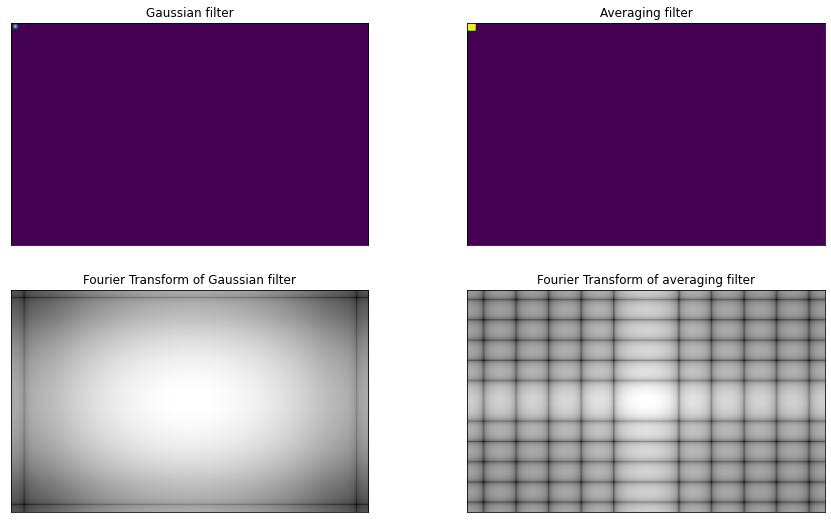

In [40]:
plt.figure(figsize=(15,9))
plt.subplot(221)
plt.xticks([])
plt.yticks([])
plt.title('Gaussian filter')
plt.imshow(g_resized)
plt.subplot(222)
plt.title('Averaging filter')
plt.imshow(a_resized)
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.xticks([])
plt.yticks([])
plt.title('Fourier Transform of Gaussian filter')
plt.imshow(g_spectrum_magnitude, cmap='gray')
plt.subplot(224)
plt.xticks([])
plt.yticks([])
plt.title('Fourier Transform of averaging filter')
plt.imshow(a_spectrum_magnitude, cmap='gray')

Do a convolution of the images with gaussian and averaging kernels

In [41]:
###################################################################
# img_with_gaussian - Image convolved with Gaussian kernel : dimension - 280,450
# img_with_averaging - Image convolved with Averaging kernel : dimension - 280,450

# Write your solution here (2 lines of code)
###################################################################
img_with_gaussian =  sp.signal.convolve2d(img, g, mode='same', boundary='fill')
img_with_averaging =  sp.signal.convolve2d(img, a, mode='same', boundary='fill')
###################################################################

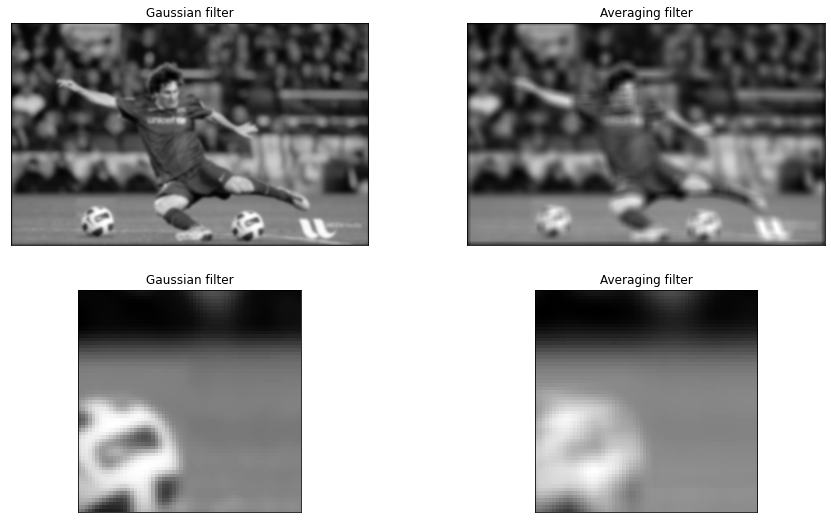

In [42]:
plt.figure(figsize=(15,9))
plt.subplot(221)
plt.xticks([])
plt.yticks([])
plt.title('Gaussian filter')
plt.imshow(img_with_gaussian, cmap='gray')
plt.subplot(222)
plt.title('Averaging filter')
plt.imshow(img_with_averaging, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.xticks([])
plt.yticks([])
plt.title('Gaussian filter')
plt.imshow(img_with_gaussian[200:264,100:164], cmap='gray')
plt.subplot(224)
plt.title('Averaging filter')
plt.imshow(img_with_averaging[200:264,100:164], cmap='gray')
plt.xticks([])
plt.yticks([]);


<h2 id="Messing-with-frequencies">Messing with frequencies<a class="anchor-link" href="#Messing-with-frequencies">¶</a></h2>


In [43]:
img = cv.imread(r"C:\Users\sudar\Desktop\IIST\main\Sem2\CV_LAB\LAB5\05-frequency-analysis_files\messi.jpg", 0)         # Write the proper path

In [44]:
img_fourier = np.fft.fft2(img)
img_fourier_shifted = np.fft.fftshift(img_fourier)
img_spectrum_magnitude = 20 * np.log(np.abs(img_fourier_shifted))

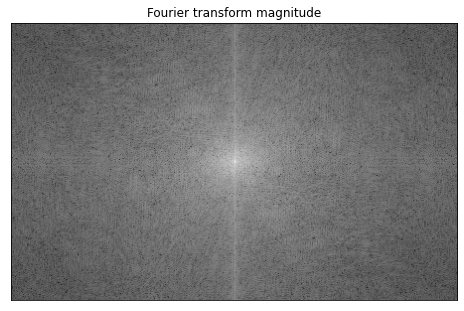

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(img_spectrum_magnitude, cmap = 'gray')
plt.title('Fourier transform magnitude')
plt.xticks([])
plt.yticks([]);

In [46]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
how_much = 10

img_fourier_shifted2 = np.copy(img_fourier_shifted)
img_fourier_shifted2[crow-how_much:crow+how_much, ccol-how_much:ccol+how_much] = complex(1e-32)
img_spectrum_magnitude = 20 * np.log(np.abs(img_fourier_shifted2))

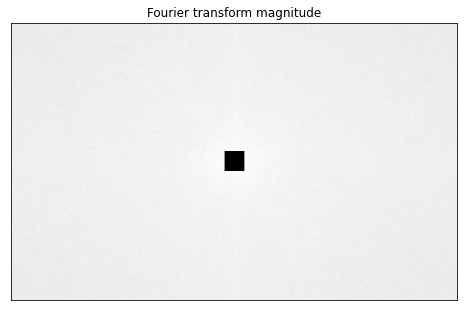

In [47]:
plt.figure(figsize=(8,8))
plt.imshow(img_spectrum_magnitude, cmap = 'gray')
plt.title('Fourier transform magnitude')
plt.xticks([])
plt.yticks([]);

In [48]:
img_fourier_unshifted = np.fft.ifftshift(img_fourier_shifted2)
img_back = np.fft.ifft2(img_fourier_unshifted)
img_back = np.abs(img_back)

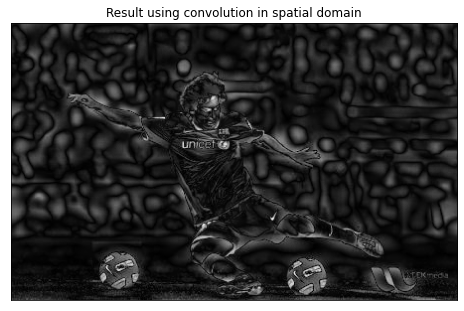

In [50]:
plt.figure(figsize=(8,8))
plt.title('Result using convolution in spatial domain')
plt.imshow(img_back, cmap='gray');
plt.xticks([])
plt.yticks([]);


<h2 id="Why-FFT?">Why FFT?<a class="anchor-link" href="#Why-FFT?">¶</a></h2><p>When dealing with convolutions, it is often much faster to carry out these in the Fourier domain.</p>


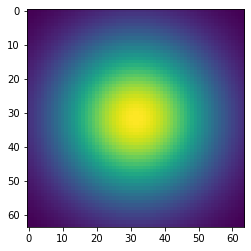

In [52]:
g = gkern(kernlen=64, sig=11)
plt.imshow(g);

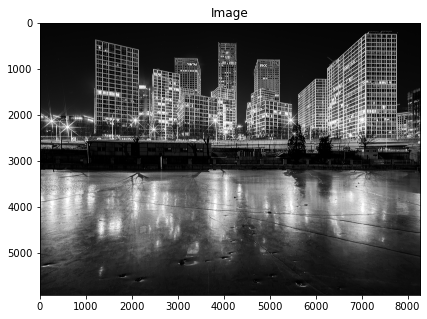

In [54]:
# Image taken from https://cdn.hasselblad.com/samples/B0000835.jpg

i = cv.imread(r"C:\Users\sudar\Desktop\IIST\main\Sem2\CV_LAB\LAB5\05-frequency-analysis_files\big.jpg", 0)               # Write the proper path
plt.figure(figsize=(10,5))
plt.title('Image')
plt.imshow(i, cmap='gray');

In [55]:
%%time
g_resized = np.zeros(i.shape)
h, w = g.shape
g_resized[:h,:w] = g
g_fourier = np.fft.fft2(g_resized)

Wall time: 6.94 s


In [56]:
%%time
i_fourier = np.fft.fft2(i)
r = i_fourier*g_fourier
i_r = np.abs(np.fft.ifft2(r))

Wall time: 11.1 s


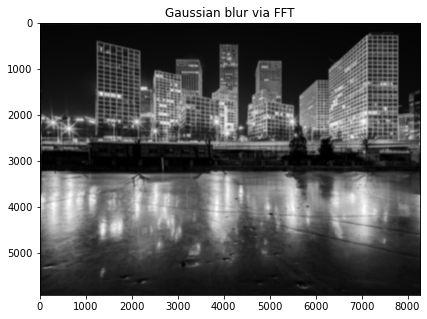

In [57]:
plt.figure(figsize=(10,5))
plt.title('Gaussian blur via FFT')
plt.imshow(i_r, cmap='gray');

In [58]:
%%time
i_r2 = sp.signal.convolve2d(i, g, mode='same', boundary='fill')

Wall time: 6min 54s


In [59]:
cv.imwrite('foo.jpg', i_r2)

True

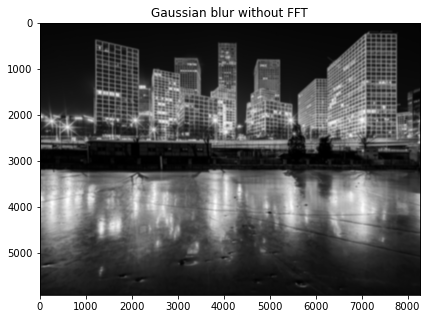

In [60]:
i_r3 = cv.imread('foo.jpg')
plt.figure(figsize=(10,5))
plt.title('Gaussian blur without FFT')
plt.imshow(i_r3, cmap='gray');

<h4>Excercise: Can you think of a reason why FFT is faster than normal convolution?</h4>

**Answer:** <br>
- Order of computations needed in convolution of an image of size $M x N$ and kernel of size $H x W$ is $O(MNHW)$. <br>
- Incase of FFT, the order or computations needed reduces to $O(MN log MN) = O(MN(log N +
log M) = O(MN log N)$


<h2 id="Summary">Summary<a class="anchor-link" href="#Summary">¶</a></h2><ul>
<li>Fourier transform</li>
<li>Image filtering in frequency domain</li>
<li>Images are smooth (image compression?)</li>
<li>Low-pass filternig before sampling</li>
<li>Nyquist Theorem</li>
</ul>
